# Montréal-Python Workshop: Data Manipulation & Machine Learning

This notebook contains my annotated solutions to the exercises discussed at the Montréal-Python workshop held on the 18th February 2023. 

<i>Ce cahier contient mes solution annotées pour l'atélier de Montréal-Python qui a eu lieu le 18 du février 2023</i>

## TOC
* [Exercise with Pandas / <i>Exercice de Pandas</i>](#exercice-de-pandas)
* [Exercise with Numpy / <i>Exercice de NumPy</i>](#exercice-de-numpy)
* [Machine Learning Exercise / <i>Exercice d'Apprentissage Automatic</i>](#exercice-d-apprentissage)

# Exercise 1 <a class="anchor" id="exercice-de-pandas"></a>

The goal of this [exercise](https://colab.research.google.com/drive/1QRNus1YCtKPAjlNT165i0NtJ3Qt2oZvr#scrollTo=kycZrfZPXa3b) was to identify the Montréal neighbourhood with the lowest number of Birch trees. [Data on public trees](https://donnees.montreal.ca/ville-de-montreal/arbres) is provided freely by the City of Montréal.

<i>Le but de cet [exercice](https://colab.research.google.com/drive/1QRNus1YCtKPAjlNT165i0NtJ3Qt2oZvr#scrollTo=kycZrfZPXa3b) était d'identifier l'arrondissement de Montréal ayant le moins de bouleaux. [Les données sur les arbres publics](https://donnees.montreal.ca/ville-de-montreal/arbres) sont fournies gratuitement par la ville.</i>

### Data Import and Cleaning

In [ ]:
import pandas as pd

# Uncomment to displ
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

DATA_URL = r"https://data.montreal.ca/dataset/b89fd27d-4b49-461b-8e54-fa2b34a628c4/resource/64e28fe6-ef37-437a-972d-d1d3f1f7d891/download/arbres-publics.csv"

# Downloading the data takes some time (file size is approx. 100mb). Serialize the data to avoid downloading it on every run.

try:
    # File -> DataFrame
    tree_df = pd.read_pickle("./montreal-trees.pickle")
except FileNotFoundError:
    tree_df = pd.read_csv(DATA_URL)
    # DataFrame -> File
    # Avoid compressing file as space is generally cheaper than time.
    pd.to_pickle(tree_df, "./montreal-trees.pickle", compression=None)

#--- Basic EDA---#

# Check the number of rows and columns, as well as column names and data types

print(f"rows, columns: {tree_df.shape}")
tree_df.dtypes.to_frame(name = "col_type")


# Correct inconsistent capitalisation of column names to make analyse easier

tree_df = tree_df.rename(str.lower, axis = "columns")

# DataFrame -> DataFrame -> Series
# Count missing values for each column 

(tree_df.isna()
    .sum()
    .to_frame(name = "missing_values"))

### Main Solution

In [ ]:
# DataFrame -> DataFrame
# Extract only data required to determine which neighbourhood has the lowest number of Birch trees

cols = ['arrond_nom', "essence_fr", "essence_latin", "essence_ang"]
tree_subset = tree_df.loc[:, cols].apply(lambda x: x.str.lower())

# Verify that classification as birch is consistent across columns.
# Doing so will allow simplification of filter required to extract
# relevant dataw

en_index = tree_df["essence_ang"].str.contains("birch").index
fr_index = tree_df["essence_fr"].str.contains("bouleau").index
latin_index = tree_df["essence_latin"].str.contains("betula").index


if not(all(en_index == fr_index) and all(fr_index == latin_index)):
    warnings.warn("Classification is not consistent", stacklevel = 2)


df_birch = tree_subset.loc[tree_subset["essence_fr"].str.contains("bouleau"), "arrond_nom"]

(df_birch.groupby(df_birch)
    .count()
    .sort_values()
    .to_frame(name = "count"))

# Exercise 2 <a class="anchor" id="exercice-de-numpy"></a>

This [exercise](https://colab.research.google.com/drive/1caSuGsZeiNHU-B_R07LNoXq7fVLYoTeK#scrollTo=Md3YAuk1lwpD) aimed to familarise participants with the NumPy library. 

<i>Cet [exercice](https://colab.research.google.com/drive/1caSuGsZeiNHU-B_R07LNoXq7fVLYoTeK#scrollTo=Md3YAuk1lwpD) visait à familiariser des participants avec la libraire de NumPy</i> 

In [ ]:
import numpy as np

examen_1_liste = [67, 89, 73, 65, 75, 95, 62]
examen_2_liste = [65, 78, 87, 98, 67, 67, 71]
examen_3 = np.random.randint(55,101, size = 15)

# Convert both lists to 1d NumPy arrays, then create 2d array with NumPy functions

examen_1_liste, examen_2_liste = map(np.array, [examen_1_liste, examen_2_liste])
student_scores_np = np.hstack((examen_1_liste.reshape(7, 1), examen_2_liste.reshape(7, 1)))

# Alternatively, with indexing and block

student_scores_np_block = np.block([examen_1_liste[:, np.newaxis], examen_2_liste[:, np.newaxis]])

# One liner to create 2d NumPy array with list comprehension

student_scores_lc = np.array([[score1, score2] for score1, score2 in zip(examen_1_liste, examen_2_liste)])

# Confirm all arrays contain the same values and are the same shape

np.array_equal(student_scores_np, student_scores_np_block)
np.array_equal(student_scores_np, student_scores_lc)

# Cleanup
del(student_scores_np_block, student_scores_lc)

# Mean for each student

student_scores_np.mean(axis=1)

# Mean and std for each exam

scores_transposed = student_scores_np.transpose()
np.vstack((scores_transposed.mean(axis = 1), scores_transposed.std(axis = 1)))

# Std for each student (e.g. z-score?)

(student_scores_np.mean(axis = 1) - scores_transposed.mean()) / scores_transposed.std()

# Add three to each score for the first exam

examen_1_liste + 3

# Return the maximum score for the first exam

examen_1_liste.max()

# Subtract a random value between 1 to 5 from each score for the second exam, n.b. 

examen_2_liste - np.random.randint(1, 6) 

# Subtract a random value between 1 to 15 for each score for exam 1. Make sure you always remove the 
# same value from each student, but create a different column for each value subtracted. 
# Subtract four values in total, resulting in a table with dimensions (7, 4)

rng = np.random.default_rng(12345)
examen_1_liste[:, np.newaxis] - rng.integers(1, 16, (7, 4))

# Calculate the average for scores in exam 1 greater than 70 

examen_1_liste[examen_1_liste > 70].mean()

# For exam 1, replace scores less than 75 with a score of 75. Do so without modifying the original array.

examen_1_cp = examen_1_liste.copy()
examen_1_cp[examen_1_cp < 75] = 75


# For exam 2, add 2 to any note higher than 60 but less than 75. Do not modify the original results.
# n.b. must conditionally assign, otherwise broadcasting will result in a shortened array

examen_2_cp = examen_2_liste.copy()
examen_2_cp[(examen_2_cp > 60) & (examen_2_cp < 75)] += 2

# Modify exam 3 such that even indexed scores are equal to 75 and the last value is equal to 65

examen_3[:-1:2] = 75
examen_3[-1] = 65


# Exercise 3

The final [exercise](https://colab.research.google.com/drive/1mALNHyYEYXTivQnrOyCFOYzgeCFG9ZMp) of the workshop built on the two preceding exercises and aimed to provide a beginner-friendly introduction to machine learning. The practical problem involved predicting electricity consumption as a function of temperature, using [data](https://github.com/mtlpy/mtlpy-exercises/tree/main/hydro/data/jours) provided by Hydro-Québec. 

<i>Le dernier [exercice](https://colab.research.google.com/drive/1mALNHyYEYXTivQnrOyCFOYzgeCFG9ZMp) de l'atélier s'appuyait sur les deux exercices derniers et visait à introduire l'apprentissage automatique aux débutants. Le problème impliquait la prédiction de la consommation d'électricité en fonction de la température, utilisant des
 [données](https://github.com/mtlpy/mtlpy-exercises/tree/main/hydro/data/jours) fournies par Hydro-Québec </i>

In [ ]:
from parsel import Selector 
from requests import get 
from os.path import exists
import pandas as pd
import matplotlib.pyplot as plt

# File -> DataFrame 
# Try to parse file using UTF-8 Encoding, if parsing fails due to a decoding error try ISO-8859-1 (Latin) instead

def read_data_remote(file):
    try:
       return pd.read_csv(file, encoding = "UTF-8", sep = ";", decimal = ",", usecols = ["Date", "kWh", "Température moyenne (°C)"], parse_dates = ["Date"])
    except UnicodeDecodeError:
       return pd.read_csv(file, encoding = "ISO-8859-1", sep = ";", decimal = ",", usecols = ["Date", "kWh", "Température moyenne (°C)"], parse_dates = ["Date"])

# File -> DataFrame
# Try to read data from file, if file does not exist download data from repo and save in current directory

def get_data(save_to_file = False, file = None):

   if(save_to_file ^ bool(file)):
      raise ValueError("`save_to_file` and `file` arguments must both evaluate to the same truth value. Did you forget to supply `file` argument?")

   DATA_REPO = r"http://github.com/mtlpy/mtlpy-exercises/tree/main/hydro/data/jours/"
   BASE_URL = r"https://raw.githubusercontent.com/mtlpy/mtlpy-exercises/main/hydro/data/jours/"
   
   res = get(DATA_REPO)
   sel = Selector(text = res.text)
   
   download_links = [BASE_URL + tail for tail in sel.css("a.js-navigation-open.Link--primary::text").getall()]

   # map produces an iterable of Pandas DataFrame which are then concatenated to produce the complete dataset.

   data = pd.concat(map(read_data_remote, download_links))

   if (save_to_file):
      data.to_pickle(f"./{file}.pickle", compression = None)

   return data
   
if(not(exists("./hydro_data.pickle"))):
   get_data(save_to_file = True, file = "hydro_data")
else:
   hydro_data = pd.read_pickle("./hydro_data.pickle")


### Exploratory Data Analysis and Data Cleaning

In [ ]:
""" Adds random jitter to values to aid plotting of densely spaced data."""
# Pandas.Series -> Pandas.Series

def jitter(values, jitter = 0.04):
   gen = np.random.default_rng()
   return values + gen.normal(0, jitter, len(values))

# Inspect data - rows, data types, and any duplicate rows

hydro_data.head()
hydro_data.dtypes
hydro_data.duplicated()

# Inspect rows with NA values

hydro_data.loc[hydro_data.isna().any(axis = 1)]


# Shorten column names 

hydro_data = hydro_data.rename(lambda x: x.lower()[:5], axis = 1)


# Convert any string values in kwh to numeric type

hydro_data["tempé"] = hydro_data["tempé"].transform(pd.to_numeric)


# Create date range running from earliest date to latest date in the dataset
# in order to test coverage of dataset

date_range = pd.date_range(min(hydro_data["date"]), max(hydro_data["date"]), freq = "D")

missing_dates = np.setdiff1d(date_range.date, hydro_data["date"].dt.date, assume_unique = True)


# Convert implicit NAs to explicit NAs with reindex

hydro_data = (hydro_data
    .drop_duplicates()
    .set_index("date")
    .reindex(date_range)
    .reset_index(names = "date")
)

0       Summer
1       Summer
2       Summer
3       Summer
4       Summer
         ...  
1105    Summer
1106    Summer
1107    Summer
1108    Summer
1109    Summer
Name: date, Length: 1110, dtype: object

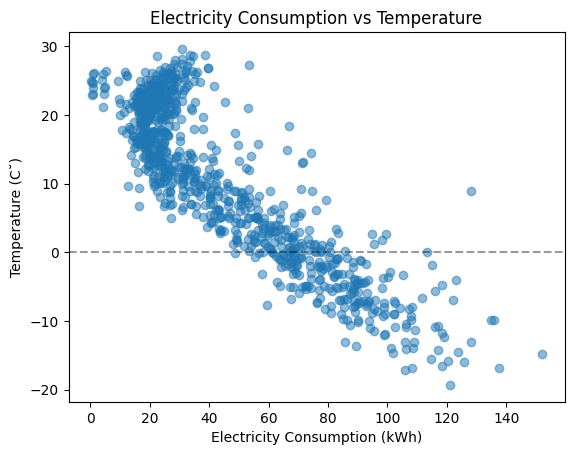

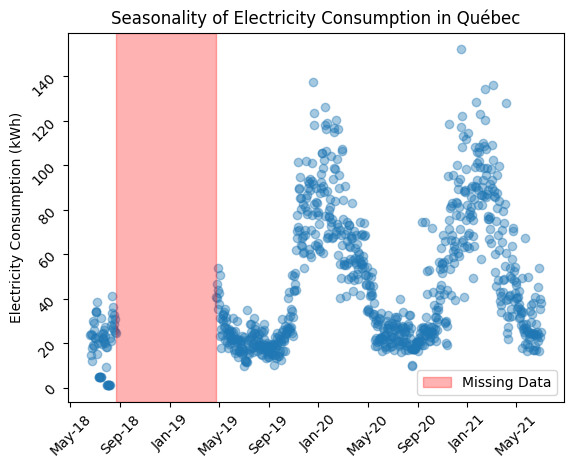

In [107]:
import matplotlib.dates as mdates

fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel("Electricity Consumption (kWh)")
ax1.set_ylabel("Temperature (C˘)")
ax1.set_title("Electricity Consumption vs Temperature")

ax1.axhline(ls = "--", color = "black", alpha = 0.4)

ax1.scatter(jitter(hydro_data["kwh"], 0.3), jitter(hydro_data["tempé"], 0.3), alpha = 0.5)

fig2 = plt.figure()
ax2 = fig2.subplots()

ax2.xaxis_date()
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

ax2.scatter(hydro_data["date"], hydro_data["kwh"], alpha = 0.4)
ax2.set_title("Seasonality of Electricity Consumption in Québec")
ax2.tick_params(rotation = 45)
ax2.set_ylabel("Electricity Consumption (kWh)")

ax2.axvspan(missing_dates.min(), missing_dates.max(), color = "red", alpha = 0.3, label = "Missing Data")
ax2.legend()

def getSeasons(month):
    if month in [12, 1, 2]:
        return "Winter"
    if month in [9, 10, 11]:
        return "Autumn"
    if month in [3, 4, 5]:
        return "Spring"
    if month in [6, 7, 8]:
        return "Summer"
    

hydro_data["date"].dt.month.map(getSeasons)


